In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
data = pd.read_csv(r"/Users/caolihe/Desktop/康奈尔/Term 1/ORIE 4741/project/final/project_final_correct.csv")
data = data.drop(['Unnamed: 0'],axis=1)
data['0.1.1.1'] = preprocessing.scale(data['0.1.1.1'])
for i in range(124,174):
    data.iloc[:,i] = preprocessing.scale(data.iloc[:,i])
data.sample(frac=1)
num = int(1524*0.8)
train = data.iloc[:num,:]
test = data.iloc[num:,:]
y_train = train["response"]
y_test = test["response"]
x_train = train.iloc[:,0:-1]
x_test = test.iloc[:,0:-1]


In [ ]:
data = pd.DataFrame(data)
data.to_csv('project_final.csv',index = False)

In [ ]:
f= data.corr()
print(f)

In [5]:
# cross-validation round 2 for l1 logistic regression
    # logistic regression
C_lr = [0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
l1 = []
for j in range(len(C_lr)):
    lr_clf_l1 = linear_model.LogisticRegression(penalty = 'l1', solver = 'liblinear',C = C_lr[j],max_iter = 10000)
    scores_l1 = cross_val_score(lr_clf_l1, x_train, y_train, cv = 5)
    scores_l1 = np.mean(scores_l1)
    l1.append(scores_l1)

In [17]:
print(l1)

[0.8753120151116509, 0.878590703636241, 0.8818795115698576, 0.8827025568373473, 0.8835188558321528, 0.8826991837010052, 0.8835188558321528, 0.8843419010996424, 0.8835222289684947, 0.8826991837010052, 0.8810598394387101]


Text(0.5, 1.0, '2nd cross-validation for logistic regression with l1 loss')

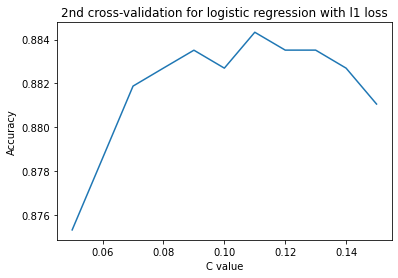

In [6]:
plt.plot(C_lr,l1)
plt.xlabel("C value")
plt.ylabel("Accuracy")
plt.title('2nd cross-validation for logistic regression with l1 loss')

In [23]:
# cross-validation round 2 for SVM rbf kernel
    # SVM
C_svm = [i for i in range(5,16)]
svm_rbf = []
for j in range(len(C_svm)):
    svm_clf = svm.SVC(kernel  = 'poly',C = C_svm[j],max_iter = 10000)
    scores_svm = cross_val_score(svm_clf, x_train, y_train, cv = 5)
    scores_svm = np.mean(scores_svm)
    print(scores_svm)
    svm_rbf.append(scores_svm)

0.8622040072859745
0.8622006341496323
0.8671254132092019
0.8663057410780544
0.8654860689469068
0.8638467246846118
0.8622040072859745
0.8630270525534642
0.8613877082911691
0.8597449908925319
0.859744990892532


In [19]:
print(svm_rbf)

[0.8490690143695607, 0.8466099979761182, 0.8449706537138232, 0.8457869527086285, 0.8457903258449708, 0.8441476084463335, 0.8425116373203805, 0.8400458746542535, 0.8375868582608108, 0.8367671861296634, 0.8384065303919584]


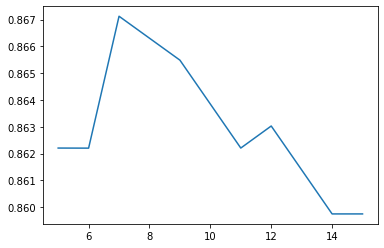

In [24]:
plt.plot(C_svm,svm_rbf)

In [ ]:
# cross-validation
    # logistic regression
C_lr = np.logspace(-2,1,4)
l1_solver = ['liblinear', 'saga']
l1 = np.zeros((len(l1_solver),len(C_lr)))
for i in range(len(l1_solver)):
    for j in range(len(C_lr)):
        lr_clf_l1 = linear_model.LogisticRegression(penalty = 'l1', solver = l1_solver[i],C = C_lr[j],max_iter = 10000)
        scores_l1 = cross_val_score(lr_clf_l1, x_train, y_train, cv = 5)
        scores_l1 = np.mean(scores_l1)
        l1[i,j] = scores_l1

In [ ]:
print(l1)

In [ ]:
#knn
log_model = LogisticRegression().fit(x_train,y_train)
print("the score of logistic model is %f" %log_model.score(x_test, y_test))


In [ ]:
l1 = pd.DataFrame(l1)
l1.to_csv('l1', index = False)

In [ ]:
l2_solver = ['saga','newton-cg','lbfgs']
l2 = np.zeros((len(l2_solver),len(C_lr)))

for i in range(len(l2_solver)):
    for j in range(len(C_lr)):
        lr_clf_l2 = linear_model.LogisticRegression(penalty = 'l2', solver = l2_solver[i],C = C_lr[j],max_iter=10000)
        scores_l2 = cross_val_score(lr_clf_l2, x_train, y_train, cv = 5)
        scores_l2 = np.mean(scores_l2)
        l2[i,j] = scores_l2

In [ ]:
l2 = pd.DataFrame(l1)
l2.to_csv('l2', index = False)

In [ ]:
elasticnet_solver = np.random.random(5)
elasticnet = np.zeros((len(elasticnet_solver),len(C_lr)))

for i in range(len(elasticnet_solver)):
    for j in range(len(C_lr)):
        lr_clf_elasticnet = linear_model.LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = elasticnet_solver[i],C=C_lr[j],max_iter =10000)
        scores_elasticnet = cross_val_score(lr_clf_elasticnet, x_train, y_train, cv = 5)
        scores_elasticnet = np.mean(scores_elasticnet)
        elasticnet[i,j] = scores_elasticnet

In [ ]:
elasticnet = pd.DataFrame(elasticnet)
elasticnet.to_csv('elasticnet', index = False)

In [ ]:
num_of_features = len(x_train.iloc[1,:])
tree_criterion = ['gini','entropy']
scores_tree = np.zeros((2,num_of_features - 3))
for i in range(len(tree_criterion)):
    for j in range(3,num_of_features):
        dt_clf = tree.DecisionTreeClassifier(criterion = tree_criterion[i],max_depth = j)
        scores = cross_val_score(dt_clf, x_train, y_train, cv = 5)
        scores = np.mean(scores)
        scores_tree[i,j-3] = scores
print(scores_tree)

In [ ]:
scores_tree = pd.DataFrame(scores_tree)
scores_tree.to_csv('tree', index = False)